In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [2]:
df1 = pd.read_csv('patients.csv')
df2 = pd.read_csv('devices.csv', parse_dates=['STOP'])
df_al = df1.merge(df2, left_on = 'Id', right_on = 'PATIENT')
df_al.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,UDI
0,d49f748f-928d-40e8-92c8-73e4c5679711,1967-06-14,NaN,999-15-5162,S99979086,X15362198X,Mr.,Wesley533,Rau926,NaN,...,-70.987997,1096170.87,5593.56,2001-07-04T08:42:44Z,NaT,d49f748f-928d-40e8-92c8-73e4c5679711,2500b8bd-dc98-44ef-a252-22dc4f81d61b,72506001,Implantable defibrillator device (physical ob...,(01)67677988606464(11)010613(17)260628(10)2882...
1,e05dd037-e45f-434a-946d-5c9076a2f596,1986-08-24,NaN,999-55-3968,S99953884,X47091743X,Mrs.,Jesus702,Hickle134,NaN,...,-71.448841,691393.45,9822.64,2010-10-24T05:28:51Z,NaT,e05dd037-e45f-434a-946d-5c9076a2f596,83cda5b1-4653-4327-a81c-14c4af434e95,72506001,Implantable defibrillator device (physical ob...,(01)20180595258346(11)101003(17)351018(10)1391...
2,0f5646bc-a156-4ec0-9252-5b592e3d3184,1997-12-14,NaN,999-45-8311,S99971449,X22361696X,Mr.,Mickey576,Crist667,NaN,...,-70.924353,482002.73,3627.16,2017-06-04T11:11:47Z,NaT,0f5646bc-a156-4ec0-9252-5b592e3d3184,7302a9ce-5845-456d-af2e-bca7a1fc387f,72506001,Implantable defibrillator device (physical ob...,(01)87988924478445(11)170514(17)420529(10)4143...
3,44c8b4c8-4457-4ba0-94b6-285ef327a249,1941-03-25,1989-01-17,999-33-7429,S99993402,X83558016X,Mr.,Jamey282,Hermiston71,NaN,...,-71.412812,986340.62,3392.04,1989-01-17T18:12:03Z,NaT,44c8b4c8-4457-4ba0-94b6-285ef327a249,7db01f61-e637-4e41-9067-0168524c991f,705643001,Coronary artery stent (physical object),(01)30831895165484(11)881227(17)140111(10)7597...
4,89752052-a38b-45f0-a590-3950bbb67bec,1954-07-29,NaN,999-15-6463,S99971913,X43982733X,Mrs.,Laverna97,Cartwright189,NaN,...,-70.826551,1322856.00,12597.56,1973-07-19T04:25:46Z,NaT,89752052-a38b-45f0-a590-3950bbb67bec,e73fe5e1-1b13-4368-b52f-673cbf1f3540,72506001,Implantable defibrillator device (physical ob...,(01)71767722231489(11)730628(17)980713(10)6519...


In [3]:
dt_stop = df_al['STOP'].dropna()
dt_stop = dt_stop.unique()
dt_stop

array([], dtype='datetime64[ns]')

In [4]:
df_al['STOP'] = df_al['STOP'].replace(dt_stop, np.full(len(dt_stop), 1))
df_al['STOP'] = df_al['STOP'].replace({pd.NaT: "0"})
df_al['STOP']

0     0
1     0
2     0
3     0
4     0
     ..
73    0
74    0
75    0
76    0
77    0
Name: STOP, Length: 78, dtype: object

In [5]:
contigency = pd.crosstab(df_al['STOP'], df_al['DESCRIPTION'])
contigency

DESCRIPTION,Coronary artery stent (physical object),Implantable cardiac pacemaker (physical object),Implantable defibrillator device (physical object)
STOP,,,
0,21,10,47


<AxesSubplot:xlabel='DESCRIPTION', ylabel='STOP'>

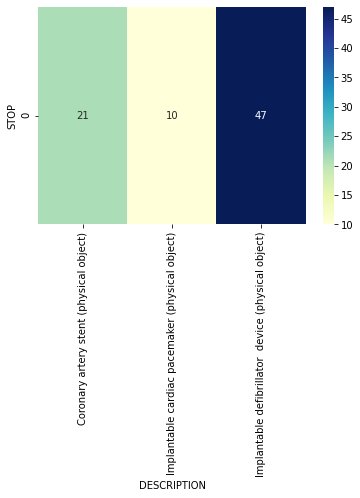

In [6]:
plt.figure(figsize=(6,4))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [7]:
c, p, dof, expected = chi2_contingency(contigency)
p

1.0

In [8]:
features_column = ['RACE', 'ETHNICITY', 'GENDER', 'DESCRIPTION']
label_column = ['STOP']

In [9]:
dataset = df_al[features_column + label_column]
dataset['STOP'] = dataset['STOP'].astype('int32')

#reference for numerical categories
categorical_dict = {}

#convert categorical data into numerical data
for feature_name in features_column:
    dataset[feature_name] = dataset[feature_name].astype('category')
    categorical_dict.update({feature_name: dataset[feature_name].cat.categories})
    dataset[feature_name] = dataset[feature_name].astype('category').cat.codes
    
print(categorical_dict)

{'RACE': Index(['asian', 'black', 'native', 'white'], dtype='object'), 'ETHNICITY': Index(['hispanic', 'nonhispanic'], dtype='object'), 'GENDER': Index(['F', 'M'], dtype='object'), 'DESCRIPTION': Index(['Coronary artery stent (physical object)',
       'Implantable cardiac pacemaker (physical object)',
       'Implantable defibrillator  device (physical object)'],
      dtype='object')}


<ipython-input-9-452f4aa08d9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['STOP'] = dataset['STOP'].astype('int32')
<ipython-input-9-452f4aa08d9e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[feature_name] = dataset[feature_name].astype('category')
<ipython-input-9-452f4aa08d9e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [10]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [11]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('STOP')
test_labels = test_features.pop('STOP')

In [12]:
def build_and_compile_model():
  model = keras.Sequential([
      layers.Dense(len(features_column)),
      layers.Dense(64, activation = 'relu'),
      layers.Dense(1)
  ])

  model.compile(loss = 'mean_absolute_error', metrics = ['accuracy'],
                optimizer = 'adam')
  return model

In [13]:
model = build_and_compile_model()

In [14]:
#fit the model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            mode='min')
history = model.fit(
    train_features[features_column],
    train_labels,
    validation_split=0.2,
    callbacks=early_stopping,
    verbose=1, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 113ms/step - loss: 1.1326 - accuracy: 0.0816 - val_loss: 1.0555 - val_accuracy: 0.0769
Epoch 2/100
2/2 [==============================] - 0s 16ms/step - loss: 1.0234 - accuracy: 0.0816 - val_loss: 0.9477 - val_accuracy: 0.0769
Epoch 3/100
2/2 [==============================] - 0s 16ms/step - loss: 0.9150 - accuracy: 0.1020 - val_loss: 0.8413 - val_accuracy: 0.1538
Epoch 4/100
2/2 [==============================] - 0s 15ms/step - loss: 0.8073 - accuracy: 0.1837 - val_loss: 0.7356 - val_accuracy: 0.1538
Epoch 5/100
2/2 [==============================] - 0s 16ms/step - loss: 0.7043 - accuracy: 0.1837 - val_loss: 0.6310 - val_accuracy: 0.2308
Epoch 6/100
2/2 [==============================] - 0s 15ms/step - loss: 0.5999 - accuracy: 0.3469 - val_loss: 0.5271 - val_accuracy: 0.3846
Epoch 7/100
2/2 [==============================] - 0s 15ms/step - loss: 0.4985 - accuracy: 0.4490 - val_loss: 0.4244 - val_accuracy: 0.4615
Epoch 8/100
2/2 [==

In [15]:
model.evaluate(test_features[features_column], test_labels)

1/1 [==============================] - 0s 12ms/step - loss: 0.1326 - accuracy: 1.0000


[0.132602721452713, 1.0]

In [16]:
model.save('model_devices')

INFO:tensorflow:Assets written to: model_devices\assets
